# Bootstrapping

* Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics.

https://statisticsbyjim.com/hypothesis-testing/bootstrapping/

* Distribution of samples with replacement from original sample
* These resamples are known as sampling distributions of estimates
* Central Limit Theorem says these resamples will start to look like a normal distribution which is a symmetrical dispersion of data around the mean
* Skewness of the original distribution disappears
* Now we are able to quantify our uncertainty about our estimates – we can find the range of values that bind 68%, 95%, 99.7% spreads of the normal curve
* The bootstrap distributions get narrower as the sample size increases
* Mean tells us expected value
* Variance provides a level of assurance regarding the mean (the more spread out the distribution the less assurance regarding the mean, samples are further away from the mean)
* Bootstrapping allows for different adjustments to bias and variance

<pre>
Bootstrapping with Replacement – repeatedly drawing samples from our sample with replacement
•	111 = 3
•	121 = 4
•	122 = 5
•	113 = 5
•	123 = 6
•	222 = 6
•	223 = 7
•	331 = 7
•	332 = 8
•	333 = 9

Combination with Replacement (3 numbers): (n + r - 1)! / (r!(n - 1)!)
•	n=3
•	r=3
•	(3 + 3 - 1)! = 5 * 4 * 3 * 2 * 1 = 120
•	(3 * 2 * 1) * (2 * 1) = 12
•	= 10
•	123 = 10 combinations 3 – 9

Combination with Replacement (4 numbers): (n + r - 1)! / (r!(n - 1)!)
•	n=4
•	r=4
•	(4 + 4 - 1)! = 7 * 6 * 5 * 4 * 3 * 2 * 1 = 5040
•	(4 * 3 * 2 * 1) * (3 * 2 * 1) = 144
•	= 35
1234 = 35 combinations 4 – 16
</pre>

In [ ]:
# https://towardsdatascience.com/bootstrapping-for-inferential-statistics-9b613a7653b2
import pandas as pd

coffee = pd.read_csv('https://raw.githubusercontent.com/samarth-agrawal-86/data_scientist_toolkit/master/coffee_dataset.csv')
print(coffee.shape)
coffee.head()

(2974, 4)


,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [ ]:
# take a sample and then find the mean of coffee drinkers
coffee_sample = coffee.sample(n=200)
coffee_sample.groupby('drinks_coffee').size() / coffee_sample.shape[0]

drinks_coffee
False    0.48
True     0.52
dtype: float64

In [ ]:
coffee_sample.groupby('drinks_coffee')['height'].agg('mean')

drinks_coffee
False    67.182055
True     68.184243
Name: height, dtype: float64

### Distribution of Sample Means

* https://www.uth.tmc.edu/uth_orgs/educ_dev/oser/L2_1.HTM

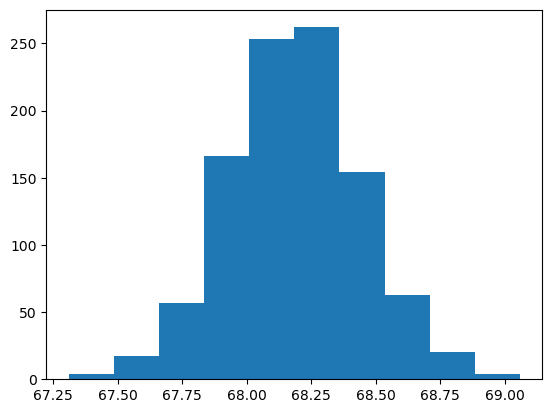

In [ ]:
# collect bootstrapped means
import matplotlib.pyplot as plt

bootstrap_means_1000 = []

for i in range(1000):
    boot = coffee_sample.sample(200, replace=True)
    boot_mean = boot[boot['drinks_coffee']==True]['height'].mean()
    bootstrap_means_1000.append(boot_mean)

plt.hist(bootstrap_means_1000);

### Uncertainty and Confidence Intervals

Check out the conclusion to this article: https://www.mathsisfun.com/data/confidence-interval.html

Confidence intervals are used to express how likely $\bar{x}$ falls within a range of values. If the hypothesized value falls in the tail outside of the one-directional area of interest, we reject the null hypothesis. If our hypothesized value falls outside of the two-tailed interval, we reject the null hypothesis.

In frequentist statistics, a confidence interval (CI) is a range of estimates for an unknown parameter. A confidence interval is computed at a designated confidence level. The 95% level is most common, but other levels (such as 90% or 99%) are sometimes used. The confidence level represents the long-run proportion of correspondingly computed intervals that end up containing the true value of the parameter. For example, out of all confidence intervals computed at the 95% level, 95% of them should contain the parameter's true value.

https://en.wikipedia.org/wiki/Confidence_interval

* Aleatory uncertainty - before I flip the coin
* Epistemic uncertainty - after I flip the coin
* Statistics focus on epistemic uncertainty; describing samples from a population
* Probability theory gives us an interval in which we can expect an observed value
* A confidence interval is the range of population parameters for which our observed statistic is possible
* 95% interval is conventional; 2 standard errors
* Recall 68 95 99 rule in a normal distribution
* With a little more precision - 68.27 95.45 and 99.73

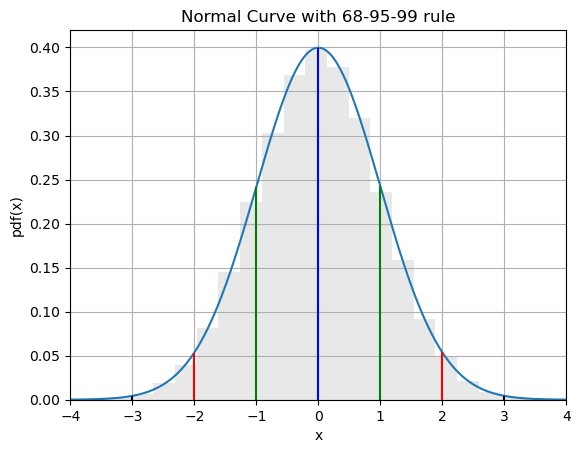

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=100000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')
# plt.axvline(np.percentile(X, 2.5), color='black')
# plt.axvline(np.percentile(X, 97.5), color='black')

plt.title('Normal Curve with 68-95-99 rule')
plt.show()

### Confidence Interval for Mean and Standard Deviation

Confidence intervals help to measure the uncertainty in a sample and how well the CI represents the actual value of the population

* We need to know the mean and the standard deviation
* $z = \frac{x - \bar{x}}{\sigma}$
* standard error = $\frac{s}{\sqrt{n}}$
* intervals = $\bar{x} \pm z\frac{s}{\sqrt{n}}$



## Standard Error

The **Standard Error (SE)** is a fundamental concept in statistics that measures the accuracy with which a sample statistic estimates a population parameter.

### What is Standard Error?

The Standard Error is the **standard deviation of a statistic's sampling distribution**.

* If the statistic is the **sample mean ($\bar{x}$)**, the standard error is called the **Standard Error of the Mean (SEM)**.

### The Sampling Distribution

To understand SE, we must first understand the **sampling distribution** of a statistic (e.g., the mean):

1.  Imagine taking **repeated, independent random samples** of the same size ($n$) from a single population.
2.  Calculate the mean ($\bar{x}$) for each of those many samples.
3.  Plotting all these sample means creates a distribution—the **sampling distribution of the mean**.

The Standard Error of the Mean (SEM) is simply the **standard deviation** of this distribution of sample means. It tells you how much the sample means typically vary from one another.

### The Mathematical Relationship

The relationship between the population variance ($\sigma^2$) and the variance of the sampling distribution ($\sigma_{\bar{x}}^2$) is precise:

$$\sigma_{\bar{x}}^2 = \frac{\sigma^2}{n}$$

This leads to the formula for the $\text{SEM}$, which is the square root of the variance:

$$\text{SEM} = \frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the population standard deviation and $n$ is the sample size.

### Key Insight: The Role of Sample Size

The denominator, $\sqrt{n}$, reveals the central insight of the SE:

* **As the sample size ($n$) increases**, the $\text{SEM}$ **decreases**.
* This happens because larger samples provide better estimates of the population mean, causing the sample means to **cluster more tightly** around the true population mean. Therefore, a smaller $\text{SEM}$ indicates a more precise and reliable estimate.
https://en.wikipedia.org/wiki/Standard_error

The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/



## Margin of Error
The **Margin of Error (MOE)** is a statistic that quantifies the amount of random sampling error in a survey or statistical result. It is the key component used to establish a **confidence interval** around an estimate.

### 1. Role in Confidence Intervals

The MOE defines the range within which the true population parameter is likely to fall.

* The **Confidence Interval (CI)** is a range constructed around the observed sample statistic (your estimate).
* **Lower Bound:** $\text{Observed Statistic} - \text{MOE}$
* **Upper Bound:** $\text{Observed Statistic} + \text{MOE}$

### 2. Relationship to Confidence Interval Width

The **width** of the entire confidence interval is **twice the margin of error**.

$$\text{CI Width} = 2 \times \text{Margin of Error}$$

For instance, if a poll shows a result of $45\%$ with an MOE of $\pm 3\%$, the confidence interval is $[42\%, 48\%]$, and the width is $6\%$.

### 3. Key Factors Influencing the MOE

The MOE is calculated using the standard error ($\text{SE}$) and a critical value ($\text{Z}^*$ or $\text{t}^*$) related to the desired confidence level:

$$\text{MOE} = (\text{Critical Value}) \times (\text{Standard Error})$$

Therefore, the MOE is determined by three main factors:

* **Confidence Level:** A higher confidence level (e.g., $99\%$ vs. $95\%$) requires a larger critical value, resulting in a **wider MOE**.
* **Sample Size ($n$):** A larger sample size leads to a smaller standard error ($\text{SE} = \frac{\sigma}{\sqrt{n}}$), resulting in a **smaller MOE**.
* **Population Variability ($\sigma$):** Higher variability in the population requires a **wider MOE**.

https://www.nngroup.com/articles/confidence-interval/

In [ ]:
# z value for confidence intervals for a standard normal distribution and our sample
import numpy as np
from scipy import stats

bs_mean = np.mean(bootstrap_means_1000)
bs_std = np.std(bootstrap_means_1000)
print(f'z for 95% of standard normal: {np.round(np.abs(stats.norm.ppf(0.025)), 3)}')
print(f'z for 2.5% of sampled means: {np.round(np.abs(stats.norm.ppf(0.025, loc=bs_mean, scale=bs_std)), 3)}')
print(f'z for 97.5% of sampled means: {np.round(np.abs(stats.norm.ppf(0.975, loc=bs_mean, scale=bs_std)), 3)}')

z for 95% of standard normal: 1.96
z for 2.5% of sampled means: 67.682
z for 97.5% of sampled means: 68.694


67.63590066621624 68.18817835711697 68.74870960452773


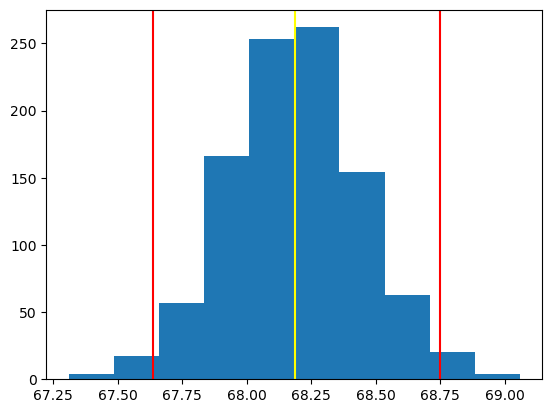

In [ ]:
# plot confidence intervals for bootstrap means 1000
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# bs_mean = np.mean(bootstrap_means_1000)
# bs_std = np.std(bootstrap_means_1000)
z = np.round(np.abs(stats.norm.ppf(0.025, loc=bs_mean, scale=bs_std)), 3)
zlo = stats.norm.ppf(.025, loc=bs_mean, scale=bs_std)
zhi = stats.norm.ppf(.975, loc=bs_mean, scale=bs_std)
se = bs_std/np.sqrt(len(bootstrap_means_1000))
moe_lo = zlo * se
moe_hi = zhi * se
ci_lo = bs_mean - moe_lo
ci_hi = bs_mean + moe_hi
print(ci_lo, bs_mean, ci_hi)
plt.hist(bootstrap_means_1000)
plt.axvline(np.mean(bootstrap_means_1000), color='yellow')
plt.axvline(ci_lo, color='red')
plt.axvline(ci_hi, color='red')
plt.show()

In [ ]:
# original sample mean
print('sample: ', coffee_sample[coffee_sample['drinks_coffee']==True]['height'].mean())
print('population: ', coffee[coffee['drinks_coffee']==True]['height'].mean())

sample:  68.18424271443357
population:  68.40021025548401
